# **Creating a Scorecard with `OptBinning` tutorial**

The purpose of this notebook is to demonstrate the creation of a Scorecard using **OptBinning**.
More detail about the library can be found in the following links:
- [GitHub page](https://github.com/guillermo-navas-palencia/optbinning)
- [Official Documentation](http://gnpalencia.org/optbinning/#)
- Article(Developing Scorecards in Python using OptBinning) 



In [3]:
import pandas as pd
from optbinning import Scorecard

## 1. Loading dataset
The dataset used in this tutorial is available at Kaggle and was part of the "Home Credit Default Risk" Challenge.
- https://www.kaggle.com/c/home-credit-default-risk/data


### 1.1. Table Application Train
The data available for the challenge is distributed throughout 8 CSV files:

* application_train.csv
* previous_application.csv
* credit_card_balance.csv
* POS_CASH_balance.csv
* installments_payments.csv
* bureau_balance.csv
* bureau.csv

Also available is the description for each column in tables (`HomeCredit_columns_description.csv`), and the application test and submission tables (`application_test.csv` and `sample_submission.csv`).

In order to make the tutorial as accessible as possible we are going to only use the `application_train.csv` file to develop the Scorecard.

In [45]:
from sklearn.model_selection import train_test_split

In [9]:
df_application_train = pd.read_csv('./home-credit-default-risk/application_train.csv', low_memory=True)
df_application_train.set_index('SK_ID_CURR', inplace=True)
df_application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_application_train, df_application_test, y_train, y_test = train_test_split(
df_application_train, df_application_train.TARGET, test_size=0.2, random_state=42)


### 1.2. Checking categorical features
`Optbinning` needs the information whether the features are numerical or categorical.
So we are going to verify the dtypes of each column to make sure it's correct. 

In [48]:
df_application_train.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [49]:
df_application_train.select_dtypes(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,
243191,Cash loans,F,Y,N,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,TUESDAY,XNA,NaN,NaN,NaN,NaN
111778,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,SATURDAY,Business Entity Type 2,reg oper account,block of flats,"Stone, brick",No
175057,Cash loans,M,Y,Y,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,Drivers,FRIDAY,Self-employed,NaN,NaN,NaN,NaN
372147,Cash loans,M,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,High skill tech staff,TUESDAY,Trade: type 3,reg oper account,terraced house,Panel,No
373412,Cash loans,M,N,Y,"Spouse, partner",Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,SATURDAY,Industry: type 11,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239009,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Cooking staff,MONDAY,Self-employed,NaN,NaN,NaN,NaN
399937,Cash loans,F,N,N,"Spouse, partner",Commercial associate,Secondary / secondary special,Married,House / apartment,Sales staff,TUESDAY,Trade: type 7,NaN,NaN,NaN,NaN
253016,Cash loans,M,Y,Y,Unaccompanied,Working,Higher education,Single / not married,House / apartment,Managers,MONDAY,Self-employed,reg oper account,block of flats,Panel,No


## 2. Creating the `BinningProcess` instance
The `Scorecard` need an instance of `BinningProcess` with the corresponding data for the dataset and also an `sklearn.linear_model`. <br>
We can also provide a `selection_criteria` for the selection of features.

In [50]:
list_features = df_application_train.drop(columns=['TARGET']).columns.values
list_categorical = df_application_train.select_dtypes(include=['object', 'category']).columns.values
selection_criteria = {"iv": {"min": 0.005, 'max':0.5, "strategy": "highest"}}

In [51]:
binning_process = BinningProcess(
    categorical_variables=list_categorical,
    variable_names=list_variables,
    selection_criteria=selection_criteria,
)

## 3. Defining the Linear Estimator
`Scorecard` accepts any Linear Estimator from Scikit-Learn. 

In [52]:
logreg = LogisticRegression(C=3, max_iter=1000, random_state=161)

## 4. Creating a Scorecard
To instantiate the 'Scorecard` class you need to pass as parameters the `binning_process` and linear model (`log_reg`), 

In [54]:
scaling_method = "min_max"
scaling_method_data = {"min": 0, "max": 1000}
scorecard = Scorecard(
    target='TARGET',
    binning_process=binning_process,
    estimator=logreg,
    scaling_method=scaling_method,
    scaling_method_params=scaling_method_data,
    intercept_based=False,
    reverse_scorecard=True,
)

In [61]:
scorecard.fit(df_application_train)

Scorecard(binning_process=BinningProcess(categorical_variables=array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSM...
                                                         'FLAG_MOBIL',
                                                         'FLAG_EMP_PHONE',
                                                         'FLAG_WORK_PHONE',
                                                         'FLAG_CONT_MOBILE',
                                                         'FLAG_PHONE',
                                                         'FLAG_EMAIL',
                                                         'OCCUPATION_TYPE',
                                                         'CNT_FAM_MEMBERS',
    

## 5. Visualizing Scorecard
To access the Scorecard table with metrics and points for each feature and bin you simply run the method `table` for your `Scorecard` fitted instance.

In [57]:
score_card_summary = scorecard.table(style="detailed").round(3)
score_card_summary

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,NAME_CONTRACT_TYPE,0,[Revolving loans],23518,0.096,22243,1275,0.054,0.427,0.015,0.002,-0.637,-6.464
1,NAME_CONTRACT_TYPE,1,[Cash loans],222490,0.904,203889,18601,0.084,-0.037,0.001,0.000,-0.637,6.788
2,NAME_CONTRACT_TYPE,2,Special,0,0.000,0,0,0.000,0.000,0.000,0.000,-0.637,5.726
3,NAME_CONTRACT_TYPE,3,Missing,0,0.000,0,0,0.000,0.000,0.000,0.000,-0.637,5.726
0,CODE_GENDER,0,"[XNA, F]",161858,0.658,150524,11334,0.070,0.155,0.015,0.002,-0.707,0.831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,AMT_REQ_CREDIT_BUREAU_YEAR,2,"[1.50, 3.50)",67066,0.273,61690,5376,0.080,0.009,0.000,0.000,-0.379,5.581
3,AMT_REQ_CREDIT_BUREAU_YEAR,3,"[3.50, 4.50)",16600,0.067,15243,1357,0.082,-0.013,0.000,0.000,-0.379,5.942
4,AMT_REQ_CREDIT_BUREAU_YEAR,4,"[4.50, inf)",21011,0.085,19160,1851,0.088,-0.095,0.001,0.000,-0.379,7.327
5,AMT_REQ_CREDIT_BUREAU_YEAR,5,Special,0,0.000,0,0,0.000,0.000,0.000,0.000,-0.379,5.726


In [58]:
##

In [37]:
from optbinning.scorecard.plots import *

In [59]:
df_application_test.loc[:, "predict_proba"] = scorecard.predict_proba(df_application_test)[:, 1]

In [64]:
df_application_train

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
243191,0,Cash loans,F,Y,N,0,171000.0,555273.0,16366.5,463500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
111778,0,Cash loans,M,N,Y,1,157500.0,198085.5,23638.5,171000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
175057,1,Cash loans,M,Y,Y,0,135000.0,776304.0,25173.0,648000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
372147,0,Cash loans,M,Y,Y,1,164133.0,900000.0,36787.5,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
373412,0,Cash loans,M,N,Y,0,225000.0,533668.5,21294.0,477000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239009,0,Cash loans,F,N,Y,0,121500.0,675000.0,32602.5,675000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
399937,0,Cash loans,F,N,N,2,225000.0,509922.0,40419.0,472500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
253016,0,Cash loans,M,Y,Y,0,450000.0,1125000.0,33025.5,1125000.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,3.0


In [63]:
df_application_test

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,predict_proba
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.214551
214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,0.016522
142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,0.126536
389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.014094
283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.074866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396891,0,Revolving loans,M,Y,Y,2,450000.0,900000.0,45000.0,900000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.072769
423085,0,Cash loans,F,N,Y,0,225000.0,202500.0,24030.0,202500.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0,0.140271
356971,0,Cash loans,M,N,Y,0,121500.0,254700.0,30357.0,225000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.037185


In [18]:
df_application_train.loc[:, "score"] = scorecard_full.score(df_application_train)

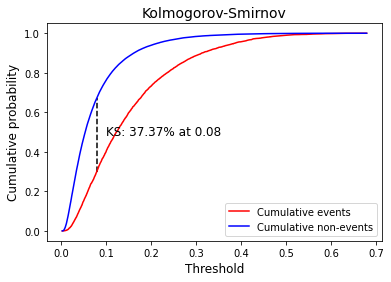

In [62]:
plot_ks(df_application_test.TARGET, df_application_test.predict_proba)

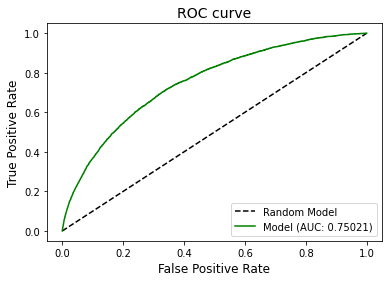

In [67]:
plot_auc_roc(df_application_test.TARGET, df_application_test.predict_proba)

In [5]:
len(df_application_train.SK_ID_CURR.unique())

307511

## Kaggle Late submission

In [36]:
df_application_test = pd.read_csv('./home-credit-default-risk/application_test.csv', low_memory=True)
df_application_test.set_index('SK_ID_CURR', inplace=True)
df_application_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
scorecard.predict_proba(df_application_test)[:, 1]

array([0.07040556, 0.14166161, 0.02010536, ..., 0.05155901, 0.07735168,
       0.12859971])

In [39]:
df_application_test.loc[:, "TARGET"] = scorecard.predict_proba(df_application_test)[:, 1]

In [44]:
df_application_test[['TARGET']].reset_index().to_csv('sample_submission.csv', index=False)

In [18]:
df_application_test.loc[:, "score"] = scorecard_full.score(df_application_train)

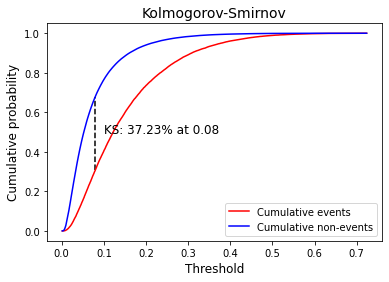

In [19]:
plot_ks(df_application_train.TARGET, df_application_train.predict_proba)

In [35]:
df_application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


### Missing Values

In [18]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(df_application_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### Dtypes

In [21]:
df_application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Create list of categorical columns

In [12]:
categorical_features = df_application_train.select_dtypes('object').columns.to_list()
categorical_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [17]:
df_application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Developing a Scorecard with `optbinning`

In [15]:
from sklearn.linear_model import LogisticRegression
from optbinning import BinningProcess, OptimalBinning
from optbinning.scorecard.scorecard import Scorecard

In [16]:
selection_criteria = {"iv": {"min": 0.005, 'max':0.5, "strategy": "highest"}}

In [17]:
list_variables = df_application_train.columns.to_list()
list_variables.remove('TARGET')

In [18]:
len(list_variables)

120

### Tutorial OptBinning base class

In [33]:
X = df_application_train.AMT_INCOME_TOTAL
y = df_application_train.TARGET

In [29]:
optb = OptimalBinning(name='AMT_INCOME_TOTAL', dtype="numerical", solver="cp")

In [34]:
optb.fit(X, y)

OptimalBinning(name='AMT_INCOME_TOTAL')

In [35]:
X_binned = optb.transform(X)

In [36]:
X_binned

array([ 0.00851737,  0.14662607,  0.03602178, ..., -0.05990768,
       -0.03939164, -0.05990768])

In [31]:
optb.binning_table.build()


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 76477.50)",23945,0.077867,22075,1870,0.078096,0.0360218,0.000100,1.243984e-05
1,"[76477.50, 97854.75)",36059,0.117261,33030,3029,0.084001,-0.0433018,0.000224,2.798527e-05
2,"[97854.75, 127530.00)",52111,0.169461,47528,4583,0.087947,-0.0935203,0.001541,1.926083e-04
3,"[127530.00, 157992.75)",70948,0.230717,64897,6051,0.085288,-0.0599077,0.000849,1.061217e-04
4,"[157992.75, 184511.25)",33106,0.107658,30335,2771,0.083701,-0.0393916,0.000170,2.122812e-05
5,"[184511.25, 216011.25)",23034,0.074905,21189,1845,0.080099,0.00851737,0.000005,6.768271e-07
6,"[216011.25, 232717.50)",21509,0.069945,19880,1629,0.075736,0.0692623,0.000326,4.073580e-05
7,"[232717.50, 310950.00)",24711,0.080358,22969,1742,0.070495,0.146626,0.001625,2.029228e-04
8,"[310950.00, inf)",22088,0.071828,20783,1305,0.059082,0.335447,0.007028,8.744291e-04
9,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000e+00


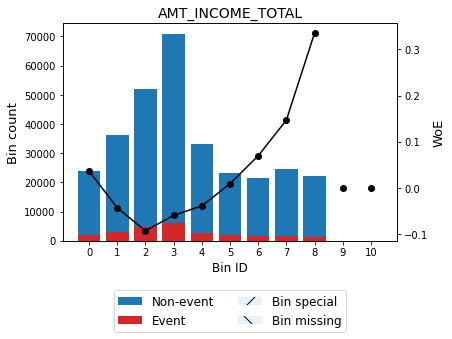

In [32]:
optb.binning_table.plot(metric="woe")


### Tutorial BinningProcess

In [38]:
df_train = df_application_train.copy()

In [54]:
list_features = df_train.drop(columns=['TARGET']).columns.values
list_categorical = df_train.select_dtypes(include=['object', 'category']).columns.values

In [56]:
# 2) Instantiate BinningProcess
binning_process = BinningProcess(
    categorical_variables=list_categorical,
    variable_names=list_features)

In [57]:
df_train_binned = binning_process.fit_transform(df_train, y)

IndexError: index 123 is out of bounds for axis 0 with size 123

In [19]:
binning_process = BinningProcess(
    categorical_variables=categorical_features,
    variable_names=list_variables,
    selection_criteria=selection_criteria,
)

NameError: name 'categorical_features' is not defined

In [14]:
lr = LogisticRegression(C=3, max_iter=1000, random_state=161)

In [15]:
# Scorecard
scaling_method = "min_max"
scaling_method_data = {"min": 0, "max": 1000}
scorecard_full = Scorecard(
    target='TARGET',
    binning_process=binning_process,
    estimator=lr,
    scaling_method=scaling_method,
    scaling_method_params=scaling_method_data,
    intercept_based=False,
    reverse_scorecard=True,
)
scorecard_full.fit(df_application_train)

Scorecard(binning_process=BinningProcess(categorical_variables=['NAME_CONTRACT_TYPE',
                                                                'CODE_GENDER',
                                                                'FLAG_OWN_CAR',
                                                                'FLAG_OWN_REALTY',
                                                                'NAME_TYPE_SUITE',
                                                                'NAME_INCOME_TYPE',
                                                                'NAME_EDUCATION_TYPE',
                                                                'NAME_FAMILY_STATUS',
                                                                'NAME_HOUSING_TYPE',
                                                                'OCCUPATION_TYPE',
                                                                'WEEKDAY_APPR_PROCESS_START',
                                                                'ORGAN

### Visualize Scorecard

In [16]:
score_card_summary = scorecard_full.table(style="detailed").round(3)
score_card_summary

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,NAME_CONTRACT_TYPE,0,[Revolving loans],29279,0.095,27675,1604,0.055,0.416,0.014,0.002,-0.635,-7.843
1,NAME_CONTRACT_TYPE,1,[Cash loans],278232,0.905,255011,23221,0.083,-0.036,0.001,0.000,-0.635,6.933
2,NAME_CONTRACT_TYPE,2,Special,0,0.000,0,0,0.000,0.000,0.000,0.000,-0.635,5.748
3,NAME_CONTRACT_TYPE,3,Missing,0,0.000,0,0,0.000,0.000,0.000,0.000,-0.635,5.748
0,CODE_GENDER,0,"[XNA, F]",202452,0.658,188282,14170,0.070,0.154,0.015,0.002,-0.667,0.447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,AMT_REQ_CREDIT_BUREAU_YEAR,2,"[1.50, 3.50)",83820,0.273,77076,6744,0.080,0.004,0.000,0.000,-0.396,5.673
3,AMT_REQ_CREDIT_BUREAU_YEAR,3,"[3.50, 4.50)",20714,0.067,19004,1710,0.083,-0.024,0.000,0.000,-0.396,6.244
4,AMT_REQ_CREDIT_BUREAU_YEAR,4,"[4.50, inf)",26252,0.085,23946,2306,0.088,-0.092,0.001,0.000,-0.396,7.629
5,AMT_REQ_CREDIT_BUREAU_YEAR,5,Special,0,0.000,0,0,0.000,0.000,0.000,0.000,-0.396,5.748


In [17]:
from optbinning.scorecard.plots import *

In [18]:
df_application_train.loc[:, "predict_proba"] = scorecard_full.predict_proba(df_application_train)[:, 1]
df_application_train.loc[:, "score"] = scorecard_full.score(df_application_train)

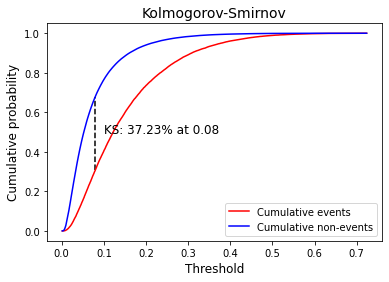

In [19]:
plot_ks(df_application_train.TARGET, df_application_train.predict_proba)

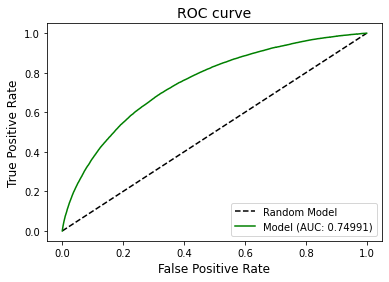

In [20]:
plot_auc_roc(df_application_train.TARGET, df_application_train.predict_proba)